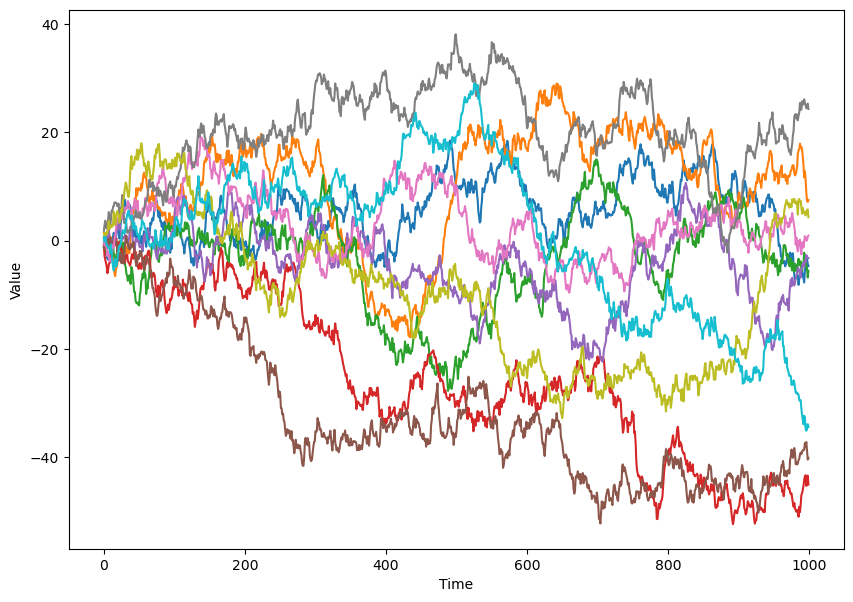

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 10
SAMPLES = 1000

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        s = rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

      Time     Path     Value
0        0  WPath 0 -0.956840
1        1  WPath 0 -0.561971
2        2  WPath 0  0.636838
3        3  WPath 0  2.269366
4        4  WPath 0  2.727699
...    ...      ...       ...
1995   995  WPath 1 -9.862968
1996   996  WPath 1 -9.252426
1997   997  WPath 1 -8.039469
1998   998  WPath 1 -5.324506
1999   999  WPath 1 -7.537251

[2000 rows x 3 columns]


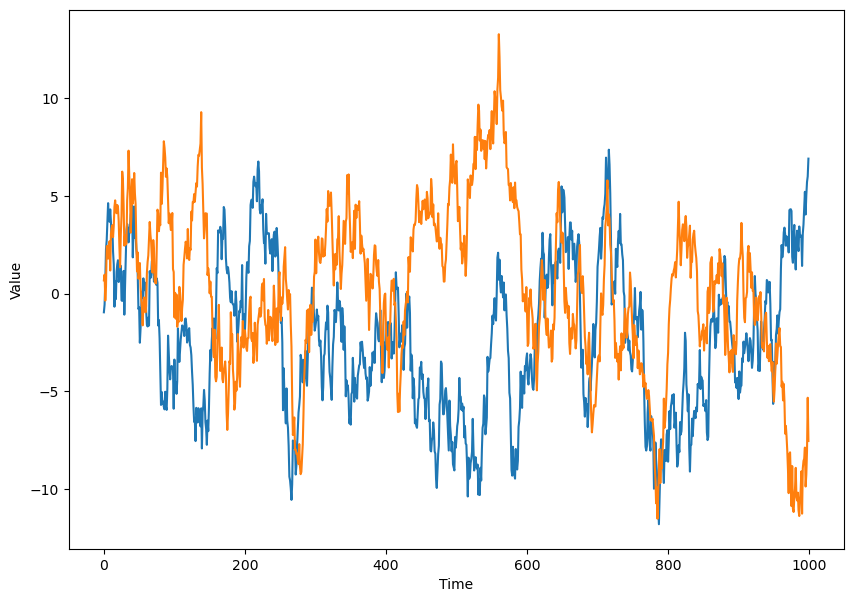

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 2
SAMPLES = 1000
THETA = 0.025
MEAN = 0

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        mean_rev_term = -THETA * (value - MEAN)
        s = mean_rev_term + rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)
print(long_form)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

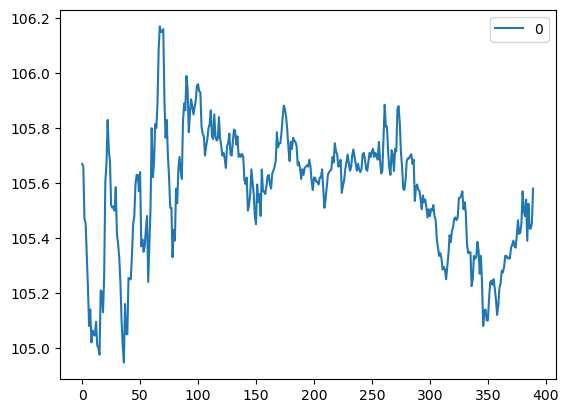

In [3]:
import yfinance

pepsi = yfinance.Ticker("PEP")
cocacola = yfinance.Ticker("KO")

START="2024-10-15"
END="2024-10-16"

pepsi_history = pepsi.history(start=START, end=END, interval="1m")
cocacola_history = cocacola.history(start=START, end=END, interval="1m")

pepsi_close_data = pepsi_history["Close"]
cocacola_close_data = cocacola_history["Close"]

spreads = []
for i in range(len(pepsi_close_data)):
    pepsi_close = pepsi_close_data.iloc[i]
    cocacola_close = cocacola_close_data.iloc[i]
    
    spread = pepsi_close - cocacola_close
    spreads.append(spread)

data = pd.DataFrame(spreads)

sns.lineplot(data=data)
plt.show()

In [4]:
import math
import numpy as np

# calibrate an OU process on the spread

# identify different statistical periods and
# piece them together relative to zero?

# first, we get a mean value to revert to,
# this will be the simple arithmetic mean
# on the dataset, the variance will also
# be derived from the spreads

VARIANCE = np.var(spreads)
MU = sum(spreads) / len(spreads)
EPOCHS = 100

NUM_SPREADS = len(spreads)

def ou_process(theta) -> list[float]:
    value = 0
    values = []

    for _ in range(NUM_SPREADS):
        brownian = rng.normal(MU, VARIANCE)
        mean_reversion = -theta * (value - MU) + math.e
        
        value += mean_reversion + brownian
        values.append(value)

    return values


def ou_calibration():
    theta = 0.05
    
    for _ in range(EPOCHS):
        values = ou_process(theta)

        # compare against spreads and find 
        error = 0
        for index in range(NUM_SPREADS):
            value = values[index]
            spread = spreads[index]

            error += (value - spread) ** 2

        error /= NUM_SPREADS
        print(error)

        # Compute gradient
        


ou_calibration()

        

4333116.21286527
4333227.805487182
4332992.661900364
4333325.691722908
4332966.446458477
4333268.43628608
4333364.252690116
4333300.349313659
4333365.300262678
4333234.283456944
4333053.957542933
4332832.4973786725
4333090.81620893
4333245.973651535
4332872.361514194
4333561.676578881
4333172.853460727
4333600.690283773
4332945.965151154
4333227.836370812
4332913.228167935
4333179.861093675
4333388.09651743
4333289.284440057
4332938.544239622
4333065.876977991
4333117.660549076
4333224.520157302
4333424.394885297
4333061.730834566
4333229.269976346
4333401.402252303
4332899.213955589
4333186.671237011
4333266.331308886
4333066.604711463
4333101.805154172
4333181.622515022
4333348.011879716
4333322.423140713
4332976.749114752
4333307.874094028
4332959.1743427515
4333194.283509865
4333403.85212794
4332803.10080345
4332873.659682227
4333217.502907098
4333153.07545028
4333561.483758745
4333018.706415522
4332912.496952755
4333044.869209406
4333467.719293378
4332958.857096705
4333234.9960837